<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Closest-relative----ocean-mixed-layer-NPZD-model" data-toc-modified-id="Closest-relative----ocean-mixed-layer-NPZD-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Closest relative -- ocean mixed layer NPZD model</a></span></li><li><span><a href="#Carbon-cycle-model-outline" data-toc-modified-id="Carbon-cycle-model-outline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carbon cycle model outline</a></span><ul class="toc-item"><li><span><a href="#ODEs" data-toc-modified-id="ODEs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ODEs</a></span></li><li><span><a href="#Model-visualization" data-toc-modified-id="Model-visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model visualization</a></span></li><li><span><a href="#Table-of-parameters" data-toc-modified-id="Table-of-parameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Table of parameters</a></span></li></ul></li><li><span><a href="#Carbon-cycle-model-validation" data-toc-modified-id="Carbon-cycle-model-validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Carbon cycle model validation</a></span></li></ul></div>

In [1]:
using RCall, PyCall, Plots, ProgressMeter, DataFrames
mt = pyimport("math")
sc = pyimport("scipy")
cst = pyimport("scipy.constants")
itg = pyimport("scipy.integrate")
R"cbp<-c('#000000', '#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00', '#CC79A7', '#e79f00', '#9ad0f3', '#F0E442', '#999999', '#cccccc', '#6633ff', '#00FFCC', '#0066cc')"
println()

# Closest relative -- ocean mixed layer NPZD model
![](graph/model_01_r.png)

NPZD model is a phenomenological ordinary differential equation (ODE) model in ocean science focus on describing the population dynamics of four major biochemical engines powering the oceanic carbon cycle system.  The nutrient pool (denoted by [$N$]) is consisting of inorganic nutrient essential for phytoplankton population growth.  Phytoplankton population (denoted by [$P$]) is assumed only one type of phytoplankton, grow by absorbing $N$ and is the food source of zooplankton (denoted by [$Z$]).  $Z$ is assumed only one type of zooplankton, food sources are including $P$ and detritus/organic matter (denoted by [$D$]) for its population growth.  $Z$ can only absorb nutrient through digestion of detritus into inorganic nutrient.  Due to the non-perfect absorption system, some "digested but not absorbed" inorganic chemical species can escape from zooplankton bodies and contribute to the $N$ pool.  For the $D$ pool, it is a collection of organic matter, including and mostly consist of cellular leftovers (i.e. dead cells from $P$ and $Z$).  It is a food source for $Z$, completing the microscopic oceanic carbon cycle.

\begin{equation}
\left\{\begin{array}{rl}
    N'(t) &= -\mu_PP + \beta_Z(1-k_{NZ})(G_P+G_D) + m_DD + (a_NZ + b_N - N)\cdot\dfrac{\omega_{mix}H'(t)}{H(t)}\\
    P'(t) &= \mu_PP - G_P - m_PP - m_{P2}P^2 - P\cdot\dfrac{\omega_{mix}H'(t)}{H(t)}\\
    Z'(t) &= \beta_Zk_N(G_P+G_D) - m_ZZ - m_{Z2}Z^2-Z\cdot\dfrac{\omega_{mix}H'(t)}{H(t)}\\
    D'(t) &= m_PP + m_{P2}P^2 + m_ZZ + (1-\beta_Z)(G_P+G_D) - G_D - (m_D + \dfrac{v_D}{H(t)})D -D\cdot\dfrac{\omega_{mix}H'(t)}{H(t)}
    \end{array}\right.
\end{equation}

# Carbon cycle model outline

![](graph/DSC_0089.jpg)
max CUE in phytoplankton (C-sequestration); min CUE in bacteria (max electricity generation)

## ODEs
By assuming conditions
1. light saturating
2. nutrient saturating

three carbon sinks (in unit $kgCm^{-3}t^{-1}$) are investigated and labeled "phytoplankton", "bacteria / E coli" and "detritus / organic matter".  
The expected ODE equations are as follow:
\begin{equation}
    \left\{\begin{array}{rl}
    [phy]'(t) &= (g_P\varepsilon_P - R_P - m_P)[phy]\\
    [mtr]'(t) &= (g_P(1-\varepsilon_P) + m_P)[phy] + (g_e(1-\varepsilon_e)[mtr] + m_e)[eco]\\
    [eco]'(t) &= (g_e\varepsilon_e[mtr] - R_e - m_e)[eco]\\
\end{array}\right.
\end{equation}
or
\begin{equation}
    \left\{\begin{array}{rl}
    [phy]'(t) &= g_P\varepsilon_P[phy] - R_P[phy] - m_P[phy]\\
    [mtr]'(t) &= g_P(1-\varepsilon_P)[phy] + m_P[phy] + g_e(1-\varepsilon_e)[eco][mtr] + m_e[eco]\\
    [eco]'(t) &= g_e\varepsilon_e[eco][mtr] - R_e[eco] - m_e[eco]\\
\end{array}\right.
\end{equation}

## Model visualization
![](graph/PBD_00.png)

## Table of parameters
notation | unit | value | range | meaning
--- | --- | --- | --- | ---
phy | $\dfrac{kgC}{m^3}$ | ? | +ve | biomass concentration of carbon in phytoplankton
mtr | $\dfrac{kgC}{m^3}$ | ? | +ve | concentration of carbon in detritus / organic matter (i.e. D in photo)
eco | $\dfrac{kgC}{m^3}$ | ? | +ve | biomass concentration of carbon in detritivore / _E. coli_ (i.e. B in photo)
$g_P$ | $t^{-1}$ | ? | +ve | pure growth rate of phytoplankton (i.e. $g$ in photo)
$\varepsilon_P$ | no | ? | 0-1 | retention efficiency of atmospheric carbon inside phytoplankton cells (i.e. $\varepsilon$ in photo)
$R_P$ | $t^{-1}$ | ? | +ve | respiration rate of phytoplankton (i.e. $R$ in photo)
$m_P$ | $t^{-1}$ | ? | +ve | death rate of phytoplankton (i.e. $m$ in photo)
$g_e$ | $t^{-1}$ | ? | +ve | pure growth rate of detritivore (i.e. $g_2$ in photo)
$\varepsilon_e$ | no | ? | 0-1 | absorption efficiency of organic carbon inside _E. coli_ cells ($\varepsilon_2$ in photo)
$R_e$ | $t^{-1}$ | ? | +ve | respiration rate of detritivore (i.e. $R_2$ in photo)
$m_e$ | $t^{-1}$ | ? | +ve | death rate of detritivore (i.e. $m_2$ in photo)

# Carbon cycle model validation

In [2]:
function ebc0(popDen, t, gp,ep,Rp,mp, gc,ec,Rc,mc)
    
    ## population densities
    P = popDen[:1]
    M = popDen[:2]
    C = popDen[:3]
    
    ## numerical adaptation to net growth
    gp = 1+gp
    gc = 1+gc
    
    ## fluctuation model
    dp = P*(gp*ep - Rp - mp)
    dm = P*(gp*(1-ep) + mp) + C*(gc*(1-ec)*M + mc)
    dc = C*(gc*ec*M - Rc - mc)
    
    ## non-recoverable elimination
    if P <=0; dp=0;end
    if C <=0; dc=0;end
    
    return(sc.array([dp,dm,dc]))
end

ebc0 (generic function with 1 method)

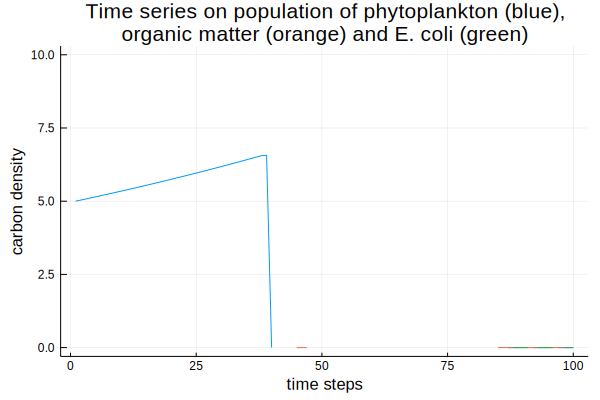

In [6]:
## model testing
t = sc.linspace(0, 1, 100) # time series

## parameters
pops = sc.array([5,5,5]) # kgC/m^3 -- carbon density
gp = .4/10 # pure growth rate [phytoplankton]
ep = .7 # nutrient-handling efficiency [phytoplankton]
Rp = .14/100 # respiration loss [phytoplankton]
mp = .14/100 # cellular death rate [phytoplankton]
gc = .2 # pure growth rate [E. coli]
ec = .8 # nutrient-handling efficiency [E. coli]
Rc = .8/10 # respiration loss [E. coli]
mc = .8/10 # cellular death rate [E. coli]

pops, infodict = itg.odeint(ebc0, pops, t, full_output=true, args=(gp,ep,Rp,mp, gc,ec,Rc,mc))
plot(pops, xlabel="time steps", ylabel="carbon density", title="Time series on population of phytoplankton (blue),\norganic matter (orange) and E. coli (green)", label="", ylim=[0,10])